In [1]:
from sqlite3 import connect
import pickle
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
# SQLite3 connection
con = connect('hotel-directories-ORI.sqlite3')
df_sql_hotel = pd.read_sql_query("SELECT * from hotel_yogyakarta", con=con)
df_sql_room = pd.read_sql_query("SELECT * from hotel_room_yogyakarta", con=con)
con.close()

# Table columns
print('Kolom Tabel Hotel :')
print(df_sql_hotel.columns)
print("Total Baris :", df_sql_hotel.shape[0])
print("Total Kolom :", df_sql_hotel.shape[1])

print('-' * 50)

print('Kolom Tabel Kamar:')
print(df_sql_room.columns)
print("Total Baris :", df_sql_room.shape[0])
print("Total Kolom :", df_sql_room.shape[1])

Kolom Tabel Hotel :
Index(['id', 'type', 'name', 'starRating', 'builtYear', 'description', 'link',
       'address', 'city', 'image', 'facilities', 'nearestPointOfInterests'],
      dtype='object')
Total Baris : 378
Total Kolom : 12
--------------------------------------------------
Kolom Tabel Kamar:
Index(['id', 'hotelId', 'roomType', 'description', 'bedDescription', 'size',
       'originalRate', 'baseOccupancy', 'maxChildAge', 'maxChildOccupancy',
       'numExtraBeds', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
       'hasLivingRoom', 'facilities'],
      dtype='object')
Total Baris : 1199
Total Kolom : 16


In [4]:
print(f"Dimensi : {df_sql_hotel.shape}")
df_sql_hotel.sample(2)

Dimensi : (378, 12)


,id,type,name,starRating,builtYear,description,link,address,city,image,facilities,nearestPointOfInterests
240,9000000502408,Hotel,Caniga Hotel Yogyakarta,1.0,None,<p><b>Lokasi</b><br>Caniga Hotel Yogyakarta ad...,https://www.traveloka.com/id-id/hotel/detail?s...,"Jalan Gunomrico, No.9, Giwangan, Umbulharjo, Y...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""WIFI_FREE"",""AIR...","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
331,9000000133901,Hotel,The Fort Hotel Yogyakarta,1.0,2012,<p><b>Lokasi</b><br>Menginap di The Fort Hotel...,https://www.traveloka.com/id-id/hotel/detail?s...,"Jl. Bugisan Selatan No 99, Kasihan, Bantul, Ka...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""CARPARK"",""RESTAURANT"",""WIFI_PUBLIC_AREA"",""WI...","[{""landmarkId"":""6106379"",""geoId"":null,""name"":""..."


In [5]:
print(f"Dimensi : {df_sql_room.shape}")
df_sql_room.sample(2)

Dimensi : (1199, 16)


,id,hotelId,roomType,description,bedDescription,size,originalRate,baseOccupancy,maxChildAge,maxChildOccupancy,numExtraBeds,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
644,1003341003,3000010004779,Standard Twin,None,None,16.0,"{""amount"":""255449"",""currency"":""IDR"",""tax"":""536...",2,5,0,0,0,1,1,0,"[""AIR_CONDITIONING"",""INTERCONNECTING_ROOMS_AVA..."
484,1002941246,3000010019240,Standard Twin,None,None,15.0,"{""amount"":""330579"",""currency"":""IDR"",""tax"":""694...",2,10,1,0,0,1,1,0,"[""AIR_CONDITIONING"",""DESK"",""HEATED_WATER"",""SHO..."


In [6]:
# Fungsi menghitung unique value
def check_unique(df):
    count = 0
    for i in df.columns:
        if df[i].nunique() == 1:
            count += 1
            print(f'{i}: {df[i].nunique()}')
        else:
            print(f'{i}: {df[i].nunique()}')
    if count == 0:
        print('No columns with only one unique value')

In [7]:
check_unique(df_sql_hotel)

id: 378
type: 1
name: 377
starRating: 8
builtYear: 38
description: 378
link: 378
address: 377
city: 1
image: 377
facilities: 372
nearestPointOfInterests: 375


In [8]:
check_unique(df_sql_room)

id: 1199
hotelId: 375
roomType: 423
description: 544
bedDescription: 0
size: 87
originalRate: 714
baseOccupancy: 9
maxChildAge: 13
maxChildOccupancy: 5
numExtraBeds: 1
isBreakfastIncluded: 2
isWifiIncluded: 2
isRefundable: 2
hasLivingRoom: 2
facilities: 600


In [9]:
hotelDrop = ['name', 'description', 'link', 'address', 'image', 'type', 'city']
roomDrop = ['id', 'roomType', 'description', 'bedDescription', 'numExtraBeds']

df_hotel = df_sql_hotel.drop(hotelDrop, axis=1)
df_room = df_sql_room.drop(roomDrop, axis=1)

print('Total Hotel Table Data : ', df_hotel.shape[0])
print('Total Hotel Table Column : ', df_hotel.shape[1])
print('-' * 30)
print('Total Room Table Data : ', df_room.shape[0])
print('Total Room Table Column : ', df_room.shape[1])

Total Hotel Table Data :  378
Total Hotel Table Column :  5
------------------------------
Total Room Table Data :  1199
Total Room Table Column :  11


In [10]:
# Rename column
df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)

In [11]:
# merge hotel dan room data
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')

# remove id column
df.drop(columns=['hotelId'], inplace=True)

# re arrange column
df = df[['originalRate', 'starRating', 'builtYear', 'size', 'baseOccupancy', 'maxChildAge',
         'maxChildOccupancy', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
         'hasLivingRoom', 'hotelFacilities', 'roomFacilities', 'nearestPointOfInterests']]

df

,originalRate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
0,"{""amount"":""1008264"",""currency"":""IDR"",""tax"":""21...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
1,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
3,"{""amount"":""1842975"",""currency"":""IDR"",""tax"":""38...",5.0,2013,60.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
4,"{""amount"":""2396694"",""currency"":""IDR"",""tax"":""50...",5.0,2013,80.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,"{""amount"":""308540"",""currency"":""IDR"",""tax"":""647...",1.0,None,15.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1195,"{""amount"":""220385"",""currency"":""IDR"",""tax"":""462...",1.0,None,16.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1196,"{""amount"":""296425"",""currency"":""IDR"",""tax"":""622...",2.0,2013,25.0,2,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1197,"{""amount"":""994485"",""currency"":""IDR"",""tax"":""208...",2.0,2013,60.0,6,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


In [12]:
for i in range(0, 5):
    print(df.loc[i, 'originalRate'])

{"amount":"1008264","currency":"IDR","tax":"211736"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1842975","currency":"IDR","tax":"387025"}
{"amount":"2396694","currency":"IDR","tax":"503306"}


In [13]:
# Extract the amount from originalRate using a lambda function
df['rate'] = df['originalRate'].apply(lambda x: json.loads(x)['amount'])
df['tax'] = df['originalRate'].apply(lambda x: json.loads(x)['tax'])
df = df.drop(columns=['originalRate'])

In [14]:
# check tipe data
print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : object
Tipe data pajak : object


In [15]:
# ubah tipe data
df['rate'] = df['rate'].astype('int')
df['tax'] = df['tax'].astype('int')

print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : int64
Tipe data pajak : int64


In [16]:

# create series for original rate
original_rate = df['rate']
# create series for tax
tax = df['tax']
# create dataframe for original rate, tax, and tax rate
df_rate = pd.DataFrame({'original_rate': original_rate, 'tax': tax})
df_rate['tax_rate'] = df_rate['tax'] / df_rate['original_rate'] * 100

df_rate

,original_rate,tax,tax_rate
0,1008264,211736,21.000056
1,1049587,220413,20.999974
2,1049587,220413,20.999974
3,1842975,387025,21.000014
4,2396694,503306,21.000011
...,...,...,...
1194,308540,64793,20.999870
1195,220385,46282,21.000522
1196,296425,62249,20.999916
1197,994485,208842,21.000015


Median pajak :  20.99999233666715
null / 0% pajak:  63
Pajak diantara 0 - 20%: 8
Rasio pajak diatas 20% : 1128


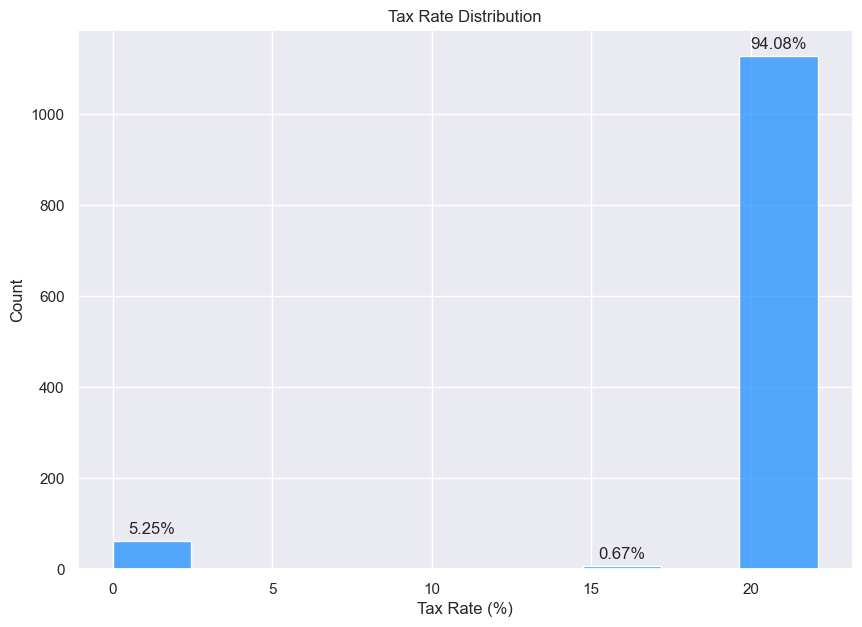

In [17]:
# count number of data with tax rate 20% and under 21%, also over 21%
count0 = 0
count_20 = 0
countBetween = 0
for i in range(len(df_rate['tax_rate'])):
    if df_rate['tax_rate'][i] < 20 and df_rate['tax_rate'][i] > 0:
        countBetween += 1
    elif df_rate['tax_rate'][i] >= 20:
        count_20 += 1
    elif df_rate['tax_rate'][i] == 0:
        count0 += 1
print('Median pajak : ', df_rate['tax_rate'].median())
print('null / 0% pajak: ', count0)
print('Pajak diantara 0 - 20%:', countBetween)
print('Rasio pajak diatas 20% :', count_20)


# plot for tax rate and give the total value on the top of the bar if the value is 0% it will not show
sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('darkgrid')
ax = sns.histplot(df_rate['tax_rate'], kde=False, color='dodgerblue', bins=9)
ax.set(xlabel='Tax Rate (%)', ylabel='Count')
ax.set_title('Tax Rate Distribution')
total = len(df_rate['tax_rate'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x()+p.get_width()/2.,
                height + 15,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
plt.show()

In [18]:
# Menghapus kolom pajak
df = df.drop(columns=['tax'])

# Mengubah target kolom menjadi di awal
# sekedar untuk merapikan dataframe
df = df[['rate'] + [col for col in df.columns if col != 'rate']]
df.columns

Index(['rate', 'starRating', 'builtYear', 'size', 'baseOccupancy',
       'maxChildAge', 'maxChildOccupancy', 'isBreakfastIncluded',
       'isWifiIncluded', 'isRefundable', 'hasLivingRoom', 'hotelFacilities',
       'roomFacilities', 'nearestPointOfInterests'],
      dtype='object')

OriginalRate Distribution by starRating
starRating
0.0    332
3.0    240
4.0    204
2.0    160
1.0    153
5.0     92
2.5     12
3.5      6
Name: count, dtype: int64


C:\Users\musta\AppData\Local\Temp\ipykernel_94528\3581573076.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentage.index, y=value_percentage.values,


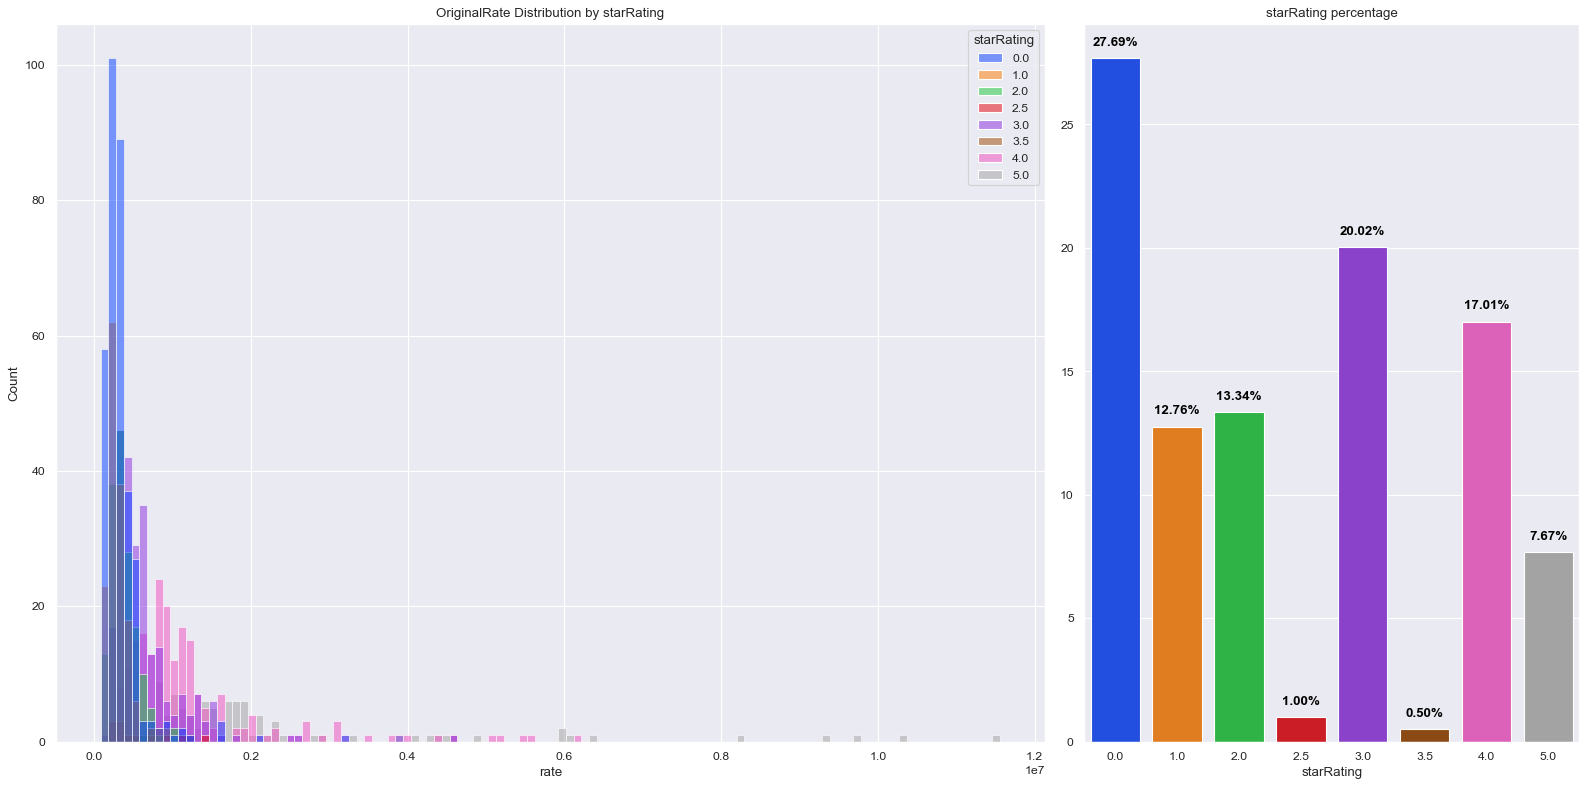

In [21]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5,
                   f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1199 non-null   int64  
 1   starRating               1199 non-null   float64
 2   builtYear                878 non-null    object 
 3   size                     1064 non-null   object 
 4   baseOccupancy            1199 non-null   int64  
 5   maxChildAge              1199 non-null   int64  
 6   maxChildOccupancy        1199 non-null   int64  
 7   isBreakfastIncluded      1199 non-null   int64  
 8   isWifiIncluded           1199 non-null   int64  
 9   isRefundable             1199 non-null   int64  
 10  hasLivingRoom            1199 non-null   int64  
 11  hotelFacilities          1199 non-null   object 
 12  roomFacilities           1199 non-null   object 
 13  nearestPointOfInterests  1199 non-null   object 
dtypes: float64(1), int64(8),

In [23]:
df['starRating'] = df['starRating'].astype('int')
print('Tipe data starRating :', df['starRating'].dtype)

Tipe data starRating : int64


In [24]:
# show index who has duplicate value
print('Total duplicated row = ', df.duplicated().sum())
# print duplicated data list index 1
df[df.duplicated(keep=False)]

Total duplicated row =  89


,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
1,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
6,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
7,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
8,1933333,5,2012,40.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""COMPLIMENTARY...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,141273,0,None,None,2,5,0,0,0,1,0,"[""HAS_24_HOUR_FRONT_DESK""]",[],"[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1173,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1174,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1189,413223,1,None,9.0,2,10,0,0,1,1,0,"[""WIFI_PUBLIC_AREA"",""ACCESS_FRIENDLY"",""ACCESSI...","[""AIR_CONDITIONING"",""DESK"",""NON_SMOKING_ROOMS""...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


In [25]:
# drop duplicate data
df = df.drop_duplicates(keep='first')
df.shape

(1110, 14)